# Solution


## Importing Library

In [23]:
#import the all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Collection

In [3]:
#loading the dataset into a pandas dataframe
loan_data = pd.read_csv("classwork.csv")

In [4]:
# Print the first five row of the dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Print the last five row of the dataset
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


The dataset contains 13 features : 


## Exploratory Data Analysis

In [6]:
# check the dataset shape
loan_data.shape

(614, 13)

As can be seen, 614 rows and 13 columns are there in the dataset

In [7]:
# chech the dataset of the datatype
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# statisticaly measure
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# check the number of missing value in the each columns
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Handeling the missing values---

loan_data.Gender.fillna(value=loan_data.Gender.mode()[0], axis=0, inplace =True )
loan_data.Married.fillna(value=loan_data.Married.mode()[0], axis=0, inplace =True )
loan_data.Dependents.fillna(value=loan_data.Dependents.mode()[0], axis = 0 , inplace = True)
loan_data.Self_Employed.fillna(value=loan_data.Self_Employed.mode()[0], axis = 0 ,inplace =True)
loan_data.LoanAmount.fillna(value = loan_data.LoanAmount.mode(), axis =0 , inplace = True)
loan_data.Loan_Amount_Term.fillna(value = loan_data.Loan_Amount_Term.mode(), axis =0 , inplace = True)
loan_data.Credit_History.fillna(value =loan_data.Credit_History.mode()[0], axis =0, inplace=True)

In [11]:
# check the missing value 
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

As can see, all the missing value are zero 

In [12]:
# Dependent column values
loan_data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
# Dependents columns replaceing value 3+ to 4

loan_data.replace(to_replace="3+" , value="4", inplace = True)

In [14]:
# Dependent column values
loan_data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [15]:
# drop the loan_id columns
loan_data.drop(columns = "Loan_ID", axis = 1, inplace = True)

## Data Visualisation

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

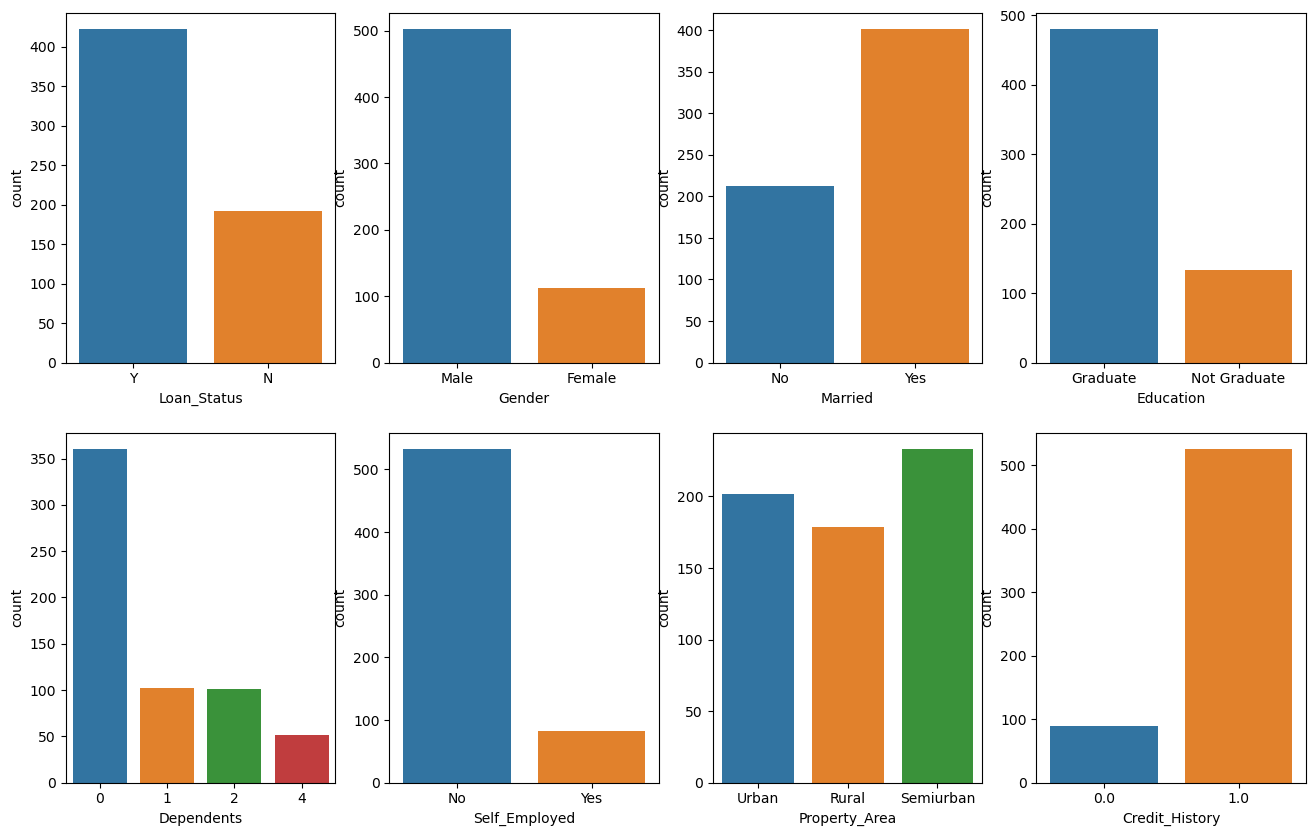

In [16]:
#visualisation the data

fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Loan_Status', data = loan_data, ax=ax[0][0])
sns.countplot(x='Gender', data=loan_data, ax=ax[0][1])
sns.countplot(x='Married', data=loan_data, ax=ax[0][2])
sns.countplot(x='Education', data=loan_data, ax=ax[0][3])
sns.countplot(x='Dependents', data=loan_data, ax=ax[1][0])
sns.countplot(x='Self_Employed', data=loan_data, ax=ax[1][1])
sns.countplot(x='Property_Area', data=loan_data, ax=ax[1][2])
sns.countplot(x='Credit_History', data=loan_data, ax=ax[1][3])

As can be seen, More Loans are approved Vs Rejected Count of Male applicants is more than Female Count of Married applicant is more than Non-married Count of graduate is more than non-Graduate Count of self-employed is less than that of Non-Self-employed Maximum properties are located in Semiurban areas Credit History is present for many applicants The count of applicants with several dependents=0 is maximum.

<AxesSubplot:xlabel='Education', ylabel='count'>

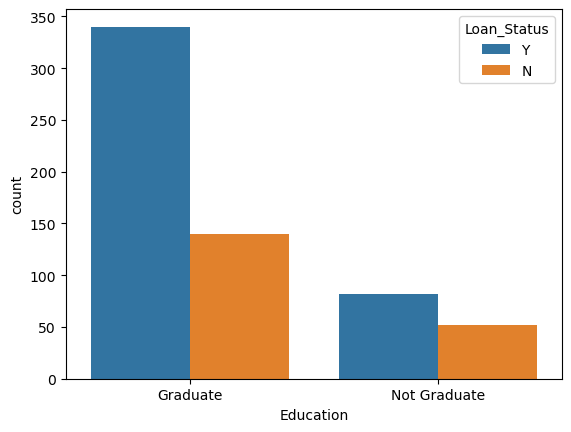

In [17]:
# Education and Loan Status
sns.countplot(x="Education", hue = "Loan_Status", data = loan_data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

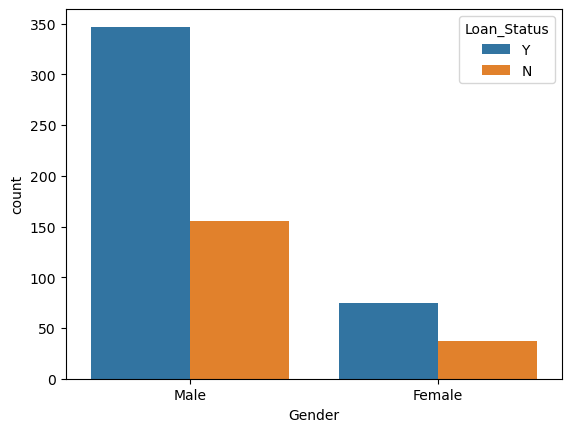

In [18]:
# Gender and Loan status
sns.countplot(x = "Gender" , hue = "Loan_Status", data= loan_data)

<AxesSubplot:xlabel='Married', ylabel='count'>

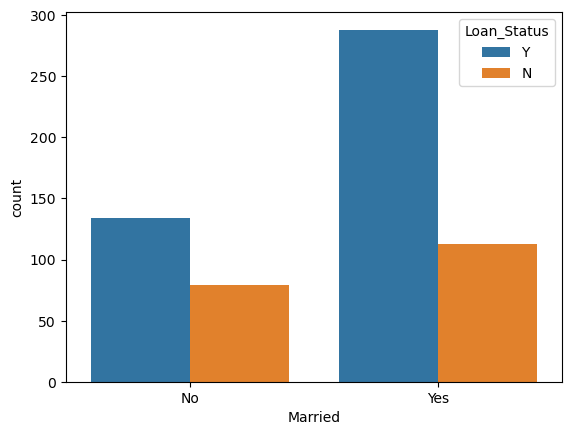

In [19]:
# Marital status and Loan Status
sns.countplot(x = "Married" , hue = "Loan_Status", data= loan_data)

### Correlation between Columns

<AxesSubplot:>

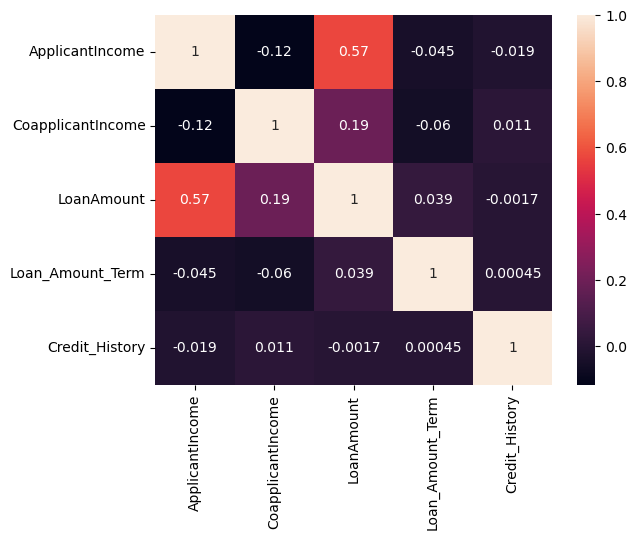

In [20]:
# correlation numerical colmns
sns.heatmap(loan_data.corr(), data = loan_data, annot= True)

### Histogram Distribution

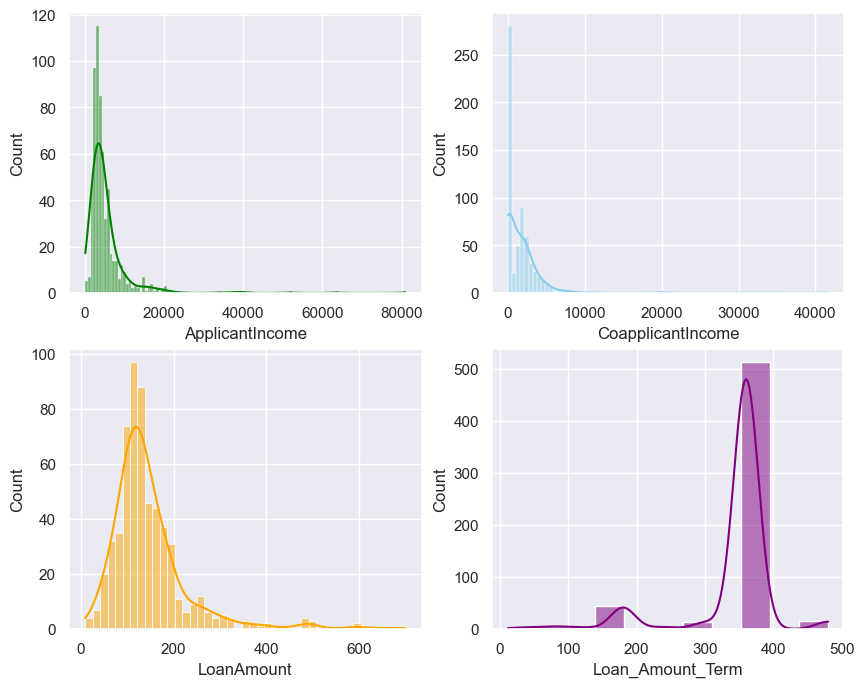

In [21]:
# Distribution numerical variable using the Histogram 

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=loan_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

### Box plot

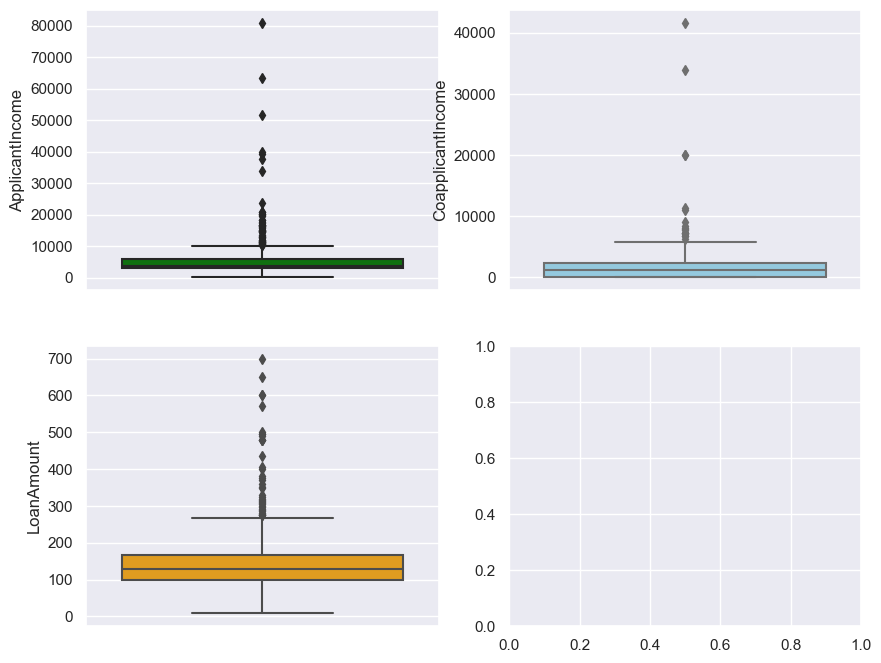

In [22]:
#Box plot using to show outliers

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=loan_data, y="ApplicantIncome", ax=axs[0, 0], color='green')
sns.boxplot(data=loan_data, y="CoapplicantIncome", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=loan_data, y="LoanAmount", ax=axs[1, 0], color='orange');

In [ ]:
d